In [83]:
#Import libraries
import nltk
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import string
import math
import os

In [84]:
#Dir with files of the 7 groups
DIR = "C:\\Users\\vinicius\\Desktop\\Padroes\\Trab2\\AllDocs\\"

In [85]:
#Read all files
for files in os.walk(DIR):
    d = files
documents = d[2][:]

#Most relevant terms of each group
terms = [
    "carbohydr",
    "oligosaccharid",
    "glycosyl",
    "glycoprotein",
    "diseas",
    "cell",
    "develop",
    "In",
    "site",
    "bind",
    "express",
    "structur",
    "result",
    "analysi",
    "one",
    "cancer",
    "protein",
    "signal",
    "assay",
    "regul",
    "activ",
    "diseas",
    "effect",
    "respons",
    "pathway",
    "express",
    "therapeut",
    "increas",
    "inhibit",
    "patient",
    "hta",
    "technolog",
    "percent",
    "implement",
    "compar",
    "system",
    "evalu",
    "recommend",
    "review",
    "activ",
    "evid",
    "report",
    "improv",
    "research",
    "morphin",
    "mobil",
    "signific",
    "naloxon",
    "rate",
    "report",
    "epidur",
    "time",
    "effect",
    "found",
    "pain",
    "countri",
    "the",
    "care",
    "least",
    "patient",
    "featur",
    "high",
    "detect",
    "measur",
    "clinic",
    "annot",
    "learn",
    "system",
    "diseas",
    "care",
    "health",
    "impact",
    "cancer",
    "concept",
    "countri",
    "univers",
    "health",
    "system",
    "organiz",
    "manag",
    "applic",
    "systemat",
    "care",
    "scienc",
    "data",
    "commun",
    "inform",
    "provid",
    "sequenc",
    "analysi",
    "tool",
    "genom",
    "method",
    "variant",
    "gene",
    "associ",
    "studi",
    "model",
    "packag",
    "develop",
    "result",
    "algorithm",
    "perform",
]

terms = list(set(terms))

In [86]:
fullText = []

#Gambiarra to read Mayandre's files
Mayandre = [
    "10MY.txt",
    "3MY.txt",
    "4MY.txt",
    "7MY.txt",
    "8MY.txt",
    "9MY.txt"
]

for i in range(0, len(documents)):

    #####################################################################################################
    #Gambiarra's start delimiter
    test = True
    
    for j in Mayandre:
        if documents[i] == j:
            file = open(DIR + documents[i], "r", encoding = "utf-16")
            fullText.append(file.read())
            test = False
    
    if test:
        #####################################################################################################
        #Gambiarra's end delimiter
        file = open(DIR + documents[i], "r")
        fullText.append(file.read())

In [87]:
#Add stopwords and tokenize words before calculating TF-IDF
stopWords = set(stopwords.words('english'))
stopWords.add("Abstract")
stopWords.add("Review")
stopWords.add("Results")
stopWords.add("Conclusions")
stopWords.add("Methods")
punctuations = list(string.punctuation)

ps = PorterStemmer()

finalList = []

for i in range(0,len(documents)):

    words = word_tokenize(fullText[i])
    processedWords = []
    for word in words:
        if word not in stopWords and word not in punctuations:
            processedWords.append(ps.stem(word))
    
    finalList.append(processedWords)

In [88]:
#Compute TF
freqRel = []
palavrasPorDoc = []

for i in range(0, len(finalList)):
    novaLista = list(set(finalList[i]))
    palavrasPorDoc.append(novaLista)
    
    outraLista = []
    for j in terms:
        if finalList[i].count(j) > 0:
            outraLista.append([j, 1 + math.log10(finalList[i].count(j))])
        else:
            outraLista.append([j, 0])
        
    freqRel.append(outraLista)
    
freqRel

[[['evalu', 0],
  ['hta', 0],
  ['rate', 1.0],
  ['scienc', 0],
  ['model', 0],
  ['organiz', 0],
  ['site', 0],
  ['tool', 0],
  ['assay', 0],
  ['express', 1.0],
  ['result', 0],
  ['inform', 0],
  ['sequenc', 0],
  ['cell', 1.0],
  ['increas', 0],
  ['gene', 0],
  ['studi', 0],
  ['cancer', 1.7781512503836436],
  ['activ', 0],
  ['algorithm', 0],
  ['inhibit', 0],
  ['glycoprotein', 0],
  ['pain', 0],
  ['applic', 0],
  ['annot', 0],
  ['glycosyl', 0],
  ['countri', 0],
  ['system', 0],
  ['clinic', 1.0],
  ['variant', 0],
  ['manag', 0],
  ['the', 0],
  ['associ', 0],
  ['genom', 0],
  ['improv', 1.3010299956639813],
  ['detect', 0],
  ['signific', 0],
  ['implement', 0],
  ['structur', 0],
  ['research', 0],
  ['respons', 0],
  ['care', 0],
  ['featur', 0],
  ['provid', 1.0],
  ['health', 0],
  ['recommend', 0],
  ['perform', 0],
  ['regul', 0],
  ['learn', 0],
  ['found', 0],
  ['naloxon', 0],
  ['review', 1.0],
  ['pathway', 0],
  ['mobil', 0],
  ['oligosaccharid', 0],
  ['perce

In [89]:
#Compute IDF
idf = []

for word in terms:
    
    counter = 0;
    for i in range(0, len(finalList)):
        if finalList[i].count(word) > 0:
            counter = counter + 1;
            
    idf.append([word, math.log10((len(finalList) + 1) / counter)])
    
idf

[['evalu', 0.7697180828467809],
 ['hta', 1.4065401804339552],
 ['rate', 1.105510184769974],
 ['scienc', 1.2304489213782739],
 ['model', 0.6164897067506038],
 ['organiz', 1.7075701760979363],
 ['site', 1.105510184769974],
 ['tool', 0.6532125137753437],
 ['assay', 1.0707480785107621],
 ['express', 0.6406233864673231],
 ['result', 0.4443287413233549],
 ['inform', 0.41383941917545464],
 ['sequenc', 0.8044801891059927],
 ['cell', 0.5125935728818813],
 ['increas', 0.6532125137753437],
 ['gene', 0.8044801891059927],
 ['studi', 0.2925968281271184],
 ['cancer', 0.8624721360836796],
 ['activ', 0.6406233864673231],
 ['algorithm', 1.0707480785107621],
 ['inhibit', 1.1846914308175989],
 ['glycoprotein', 1.4857214264815801],
 ['pain', 1.7075701760979363],
 ['applic', 0.8624721360836796],
 ['annot', 1.4065401804339552],
 ['glycosyl', 1.4065401804339552],
 ['countri', 1.5826314394896364],
 ['system', 0.6049078342007886],
 ['clinic', 0.6795414524976928],
 ['variant', 1.281601443825655],
 ['manag', 1.18

In [118]:
#Compute TF-IDF
tfidf = []

for doc in range(0, len(freqRel)):
    temp = []
    for i in range(0, len(freqRel[doc])):
        for j in range(0, len(idf)):
            if idf[j][0] == freqRel[doc][i][0]:
                res = freqRel[doc][i][1] * idf[j][1]
        temp.append(res)
    tfidf.append(temp)

tfidf

[[0.0,
  0.0,
  1.105510184769974,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.6406233864673231,
  0.0,
  0.0,
  0.0,
  0.5125935728818813,
  0.0,
  0.0,
  0.0,
  1.5336059071982469,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.6795414524976928,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.9595530755214944,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.5412387543314113,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.7533276666586115,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.4212634372546615,
  0.0,
  0.0,
  0.0,
  0.0,
  1.715402657373384,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.6795414524976928,
  0.0,
  0.6283889300503115,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.8624721360836796],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.4383019108977664,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2925968281271184,
  0.0,
  0.9462784204213714,
  0.0,
  0.0,
  0.0,
  0.0

In [119]:
#Import libraries to do K-means clustering and plot results
from sklearn import metrics
from sklearn.cluster import KMeans
from numpy import *

import pandas as pd 

import matplotlib.pyplot as plt

%matplotlib inline

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

q_clusters = 7
k = KMeans(n_clusters=q_clusters, init = 'random', max_iter = 400, n_init=100)

k.fit(tfidf)

k.predict(tfidf)

array([4, 2, 4, 2, 1, 2, 3, 4, 0, 4, 4, 4, 5, 4, 1, 2, 3, 5, 4, 4, 4, 4,
       2, 0, 4, 2, 3, 2, 1, 1, 3, 0, 4, 4, 4, 1, 4, 4, 4, 1, 4, 5, 3, 2,
       1, 6, 4, 4, 4, 3, 1, 3, 4, 4, 1, 4, 4, 1, 4, 4, 4, 3, 1, 3, 4, 3,
       4, 5, 4, 4, 1, 2, 2, 3, 1, 3, 4, 3, 1, 4, 4, 3, 4, 4, 4, 3, 4, 2,
       4, 3, 4, 3, 4, 4, 2, 0, 2, 4, 4, 2, 4, 4, 4, 1, 1, 4, 1, 4, 1, 1,
       4, 2, 3, 2, 1, 2, 2, 4, 4, 4, 5, 0, 4, 1, 2, 2, 3, 5, 0, 2, 1, 4,
       4, 3, 2, 4, 2, 1, 2, 2, 3, 2, 3, 2, 4, 3, 4, 4, 0, 2, 1, 2])

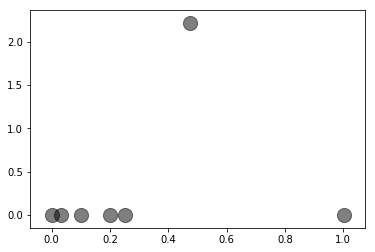

In [121]:
centers = k.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [122]:
clusters = k.labels_.tolist()

In [123]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

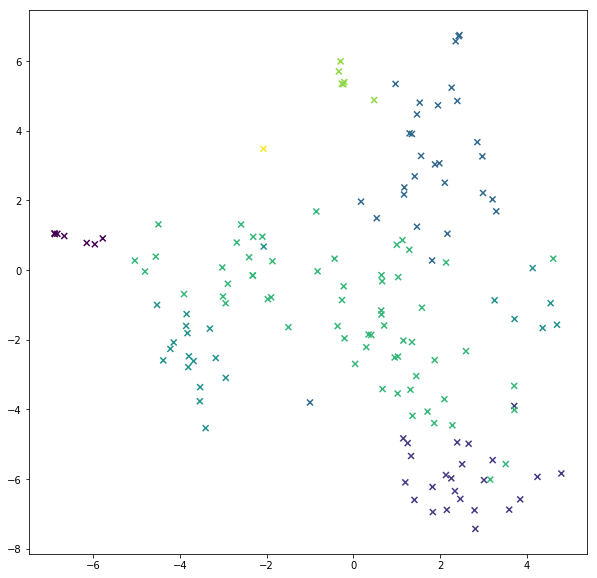

In [124]:
tfs_reduced = TruncatedSVD(n_components=q_clusters, random_state=0).fit_transform(tfidf)
tfs_embedded = TSNE(n_components=2, perplexity=40).fit_transform(tfs_reduced)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = k.labels_)
plt.show()

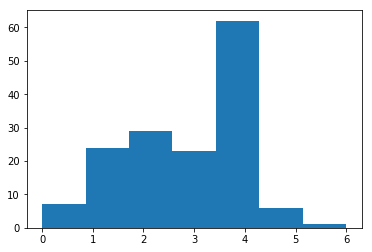

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(k.labels_, bins=q_clusters)
plt.show()

In [126]:
cluster_assignments_dict = {}

for i in set(k.labels_):
    current_cluster_bills = [documents[x] for x in np.where(km.labels_ == i)[0]]
    cluster_assignments_dict[i] = current_cluster_bills

In [127]:

import os
from string import digits
from collections import Counter
remove_digits = str.maketrans('', '', digits)

for cluster_id in range(0,q_clusters):
    print ('Cluster {0}' . format(cluster_id))
    qtd_per_cluster = []
    for key in cluster_assignments_dict[cluster_id]:
        qtd_per_cluster .append(((os.path.splitext(key)[0]).translate(remove_digits)))
    print(Counter(qtd_per_cluster))

Cluster 0
Counter({'BC': 35, 'MT': 15, 'MY': 2, 'VM': 1})
Cluster 1
Counter({'MG': 12, 'MY': 7, 'VM': 6, 'RA': 5, 'BC': 1})
Cluster 2
Counter({'NR': 50, 'VM': 7, 'MG': 3, 'BC': 3, 'MT': 2, 'RA': 2, 'MY': 1})
Cluster 3
Counter()
Cluster 4
Counter()
Cluster 5
Counter()
Cluster 6
Counter()
